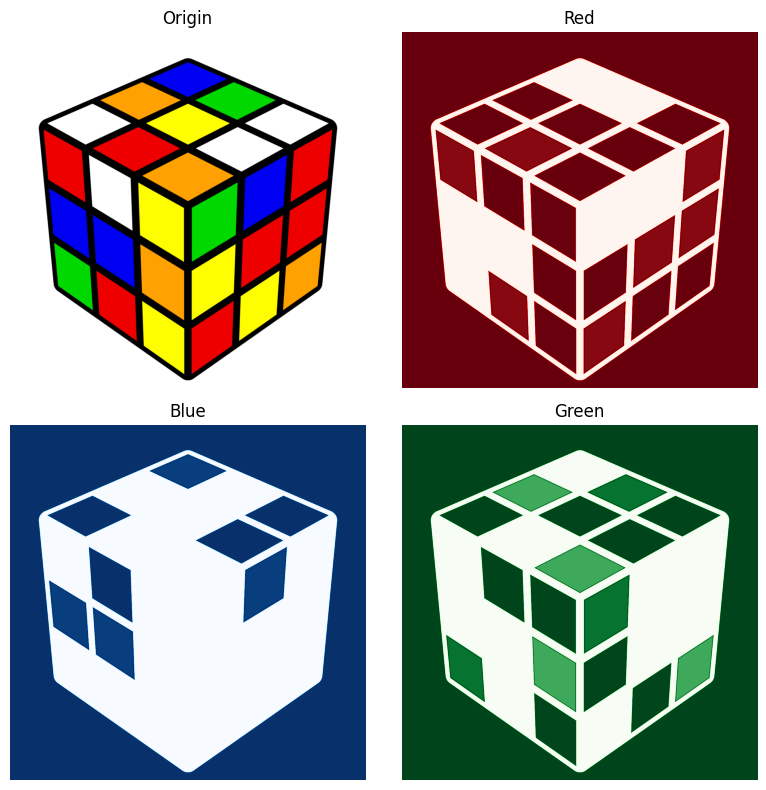

In [797]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rng

image = cv2.imread('images/square2.png')

blue, green, red = cv2.split(image)

# high pass per il colore rosso -> evidenziazione dei bordi della immagine 
blur = cv2.GaussianBlur(red, (9,9), 0)
high_pass = cv2.subtract(red, blur)
high_pass = cv2.convertScaleAbs(high_pass, alpha = 3.0)
# combinazione high pass con l'immagine originale rossa
red = cv2.add(red, high_pass)

# high pass per il colore blu -> evidenziazione dei bordi della immagine 
blur = cv2.GaussianBlur(blue, (9,9), 0)
high_pass = cv2.subtract(blue, blur)
high_pass = cv2.convertScaleAbs(high_pass, alpha = 3.0)
# combinazione high pass con l'immagine originale blu
blue = cv2.add(blue, high_pass)

# high pass per il colore verde -> evidenziazione dei bordi della immagine 
blur = cv2.GaussianBlur(green, (9,9), 0)
high_pass = cv2.subtract(green, blur)
high_pass = cv2.convertScaleAbs(high_pass, alpha = 3.0)
# combinazione high pass con l'immagine originale verde
green = cv2.add(green, high_pass)


plt.figure(figsize=(8, 8))

# Prima immagine
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Origin')
plt.axis('off')

# Seconda immagine
plt.subplot(2, 2, 2)
plt.imshow(red, cmap='Reds')
plt.title('Red')
plt.axis('off')

# Terza immagine
plt.subplot(2, 2, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Blue')
plt.axis('off')

# Quarta immagine
plt.subplot(2, 2, 4)
plt.imshow(green, cmap='Greens')
plt.title('Green')
plt.axis('off')

plt.tight_layout()  # Aggiunge spaziatura tra le immagini per una migliore visualizzazione
plt.show()

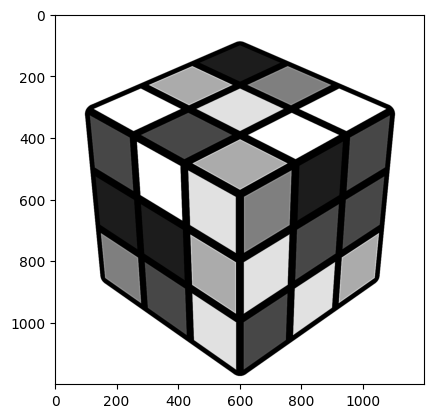

In [798]:
HP_gray_image = cv2.cvtColor(cv2.merge([blue, green, red],), cv2.COLOR_BGR2GRAY) # immagine High Pass in B/W
plt.imshow(HP_gray_image,cmap="gray")

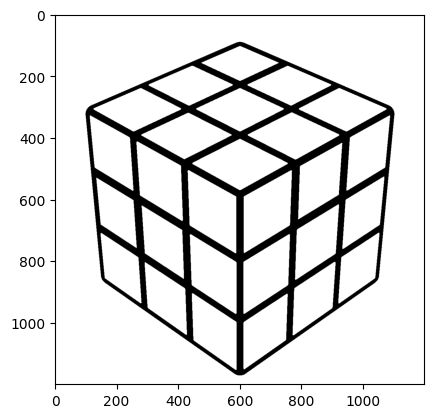

In [799]:
# threshold binario per identificare i bordi delle caselle nel cubo
blur = cv2.GaussianBlur(HP_gray_image, (7, 7), 0)
ret,threshold_image = cv2.threshold(blur,25,255,cv2.THRESH_BINARY)

plt.imshow(threshold_image,cmap="gray")

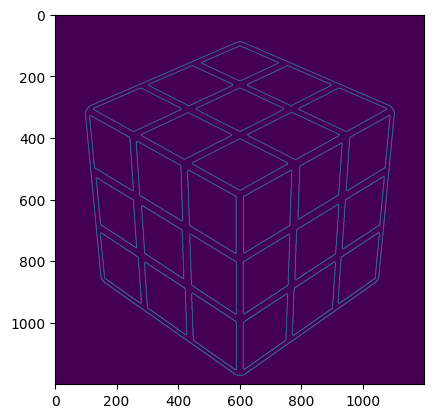

In [800]:
# edge detection
edged = cv2.Canny(threshold_image, 30, 200) 
cv2.waitKey(0) 

plt.imshow(edged)

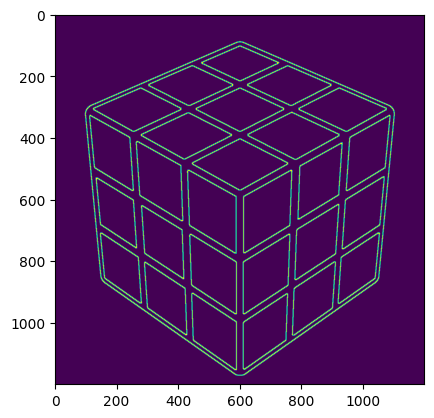

In [801]:
# chiusura dei buchi ed ingrossamento dei bordi
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, None)
plt.imshow(edged)

Number of Contours found = 56


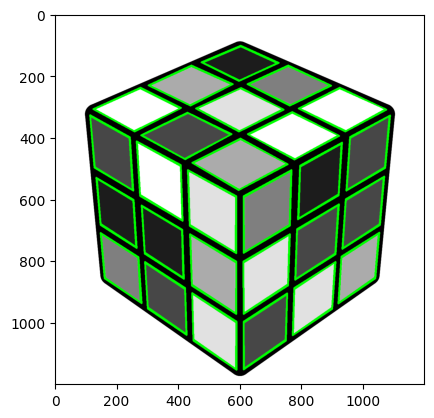

In [802]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours))) 

# filtra i contorni in al numero di angoli di un poligono
filtered_contours = []
for i, c in enumerate(contours):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))

    # approssimazione ad un poligono
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    if len(approx) == 4:
        filtered_contours.append(approx) 



# visualizza l'immagine risultante
tmp = cv2.cvtColor(HP_gray_image,cv2.COLOR_GRAY2RGB)
cv2.drawContours(tmp, filtered_contours, -1, (0, 255, 0), thickness = 3)
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

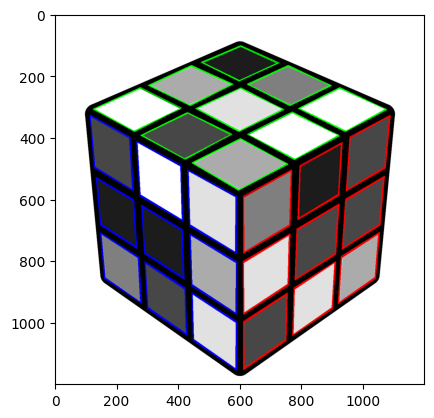

In [804]:
image_height, image_width, _ = image.shape
center_x = image_width // 2
center_y = image_height // 2

# duddivide i quadrati in base alla loro posizione rispetto al centro
top_quadrati = []
right_quadrati = []
left_quadrati = []
for contour in filtered_contours:

    # punto centrale di un quadratino
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # classificazione in base al centro del rubiks cube
    if cY < center_y - abs(center_x-cX)/2:
        top_quadrati.append(contour)
    elif cX > center_x:
        right_quadrati.append(contour)
    elif cX < center_x:
        left_quadrati.append(contour)

# output
tmp = cv2.cvtColor(HP_gray_image,cv2.COLOR_GRAY2RGB)
cv2.drawContours(tmp, top_quadrati, -1, (0, 255, 0), 2)
cv2.drawContours(tmp, right_quadrati, -1, (0, 0, 255), 2)
cv2.drawContours(tmp, left_quadrati, -1, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))